In [16]:
import pandas as pd
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # support vector machine
from IPython.display import display # for displaying data
%matplotlib inline 

In [8]:
# comparison of my two datasets (season 17/18)
data = pd.read_csv("/Users/michaelbuchar/Desktop/football-games-odds/Bundesliga_results/season-1718_csv.csv")
data2 = pd.read_csv("/Users/michaelbuchar/Desktop/football-games-odds/Bundesliga_results_with_odds/D1.csv")

In [18]:
display(data)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2017-08-18,Bayern Munich,Leverkusen,3,1,H,2,0,H,13,...,8,4,13,17,4,5,1,2,0,0
1,2017-08-19,Hamburg,Augsburg,1,0,H,1,0,H,11,...,5,1,18,16,3,7,4,3,0,0
2,2017-08-19,Hertha,Stuttgart,2,0,H,0,0,D,10,...,3,2,18,12,5,1,2,1,0,0
3,2017-08-19,Hoffenheim,Werder Bremen,1,0,H,0,0,D,14,...,3,2,17,15,6,4,1,3,0,0
4,2017-08-19,Mainz,Hannover,0,1,A,0,0,D,14,...,6,2,18,14,13,1,3,5,0,0
5,2017-08-19,Schalke 04,RB Leipzig,2,0,H,1,0,H,11,...,5,3,22,18,4,5,2,2,0,0
6,2017-08-19,Wolfsburg,Dortmund,0,3,A,0,2,A,9,...,0,5,7,15,3,5,0,0,0,0
7,2017-08-20,Freiburg,Ein Frankfurt,0,0,D,0,0,D,7,...,1,2,8,17,3,7,1,2,0,0
8,2017-08-20,M'gladbach,FC Koln,1,0,H,0,0,D,22,...,8,2,12,11,5,3,3,2,0,0
9,2017-08-25,FC Koln,Hamburg,1,3,A,0,2,A,20,...,6,4,9,9,6,7,2,2,0,1


In [12]:
#### FOR THE FIRST DATA SET ####

n_matches = data.shape[0] 
print(n_matches)
n_features = data.shape[1] - 1
print(n_features)
n_home_wins = len(data[data.FTR == 'H'])
print(n_home_wins)
win_rate = (float(n_home_wins) / (n_matches)) * 100
print(win_rate)


306
20
139
45.42483660130719


In [13]:
#### FOR THE SECOND DATA SET ####
n_matches2 = data2.shape[0] 
print(n_matches2)
n_features2 = data2.shape[1] - 1
print(n_features2)
n_home_wins2 = len(data2[data2.FTR == 'H'])
print(n_home_wins2)
win_rate2 = (float(n_home_wins2) / (n_matches2)) * 100
print(win_rate2)

198
60
84
42.42424242424242


In [27]:
average_win_rate = (win_rate+win_rate2)/2
print("Avg win rate: ")
print(average_win_rate)

Avg win rate: 
43.92453951277481


/Users/michaelbuchar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d52c5c0>,
      dtype=object)

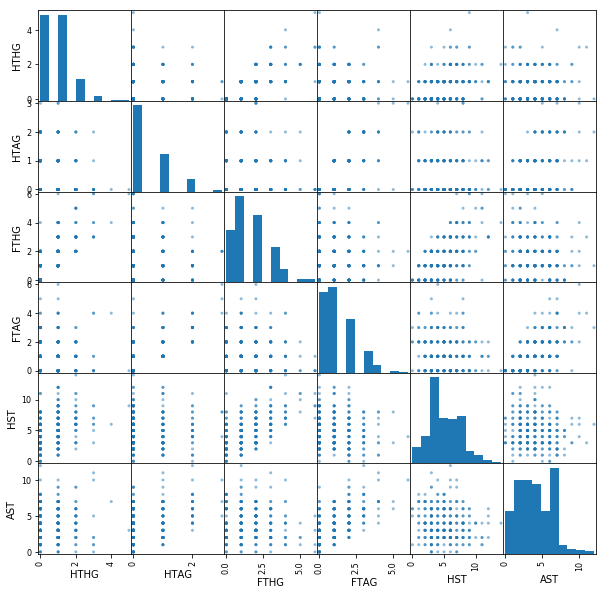

In [28]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(data[['HTHG','HTAG', 'FTHG', 'FTAG', "HST", "AST"]], figsize=(10,10)) # visualizing trends between features

In [29]:
# WORKING ON:
# Separation into feature set and the target variable
X_all = data.drop(['FTR'],1)
y_all = data['FTR']